<a href="https://colab.research.google.com/github/nimisha-jyothi/ML-Projects/blob/master/PROJECT_Bangaluru_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [45]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [46]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [47]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


In [48]:
df.shape

(13320, 9)

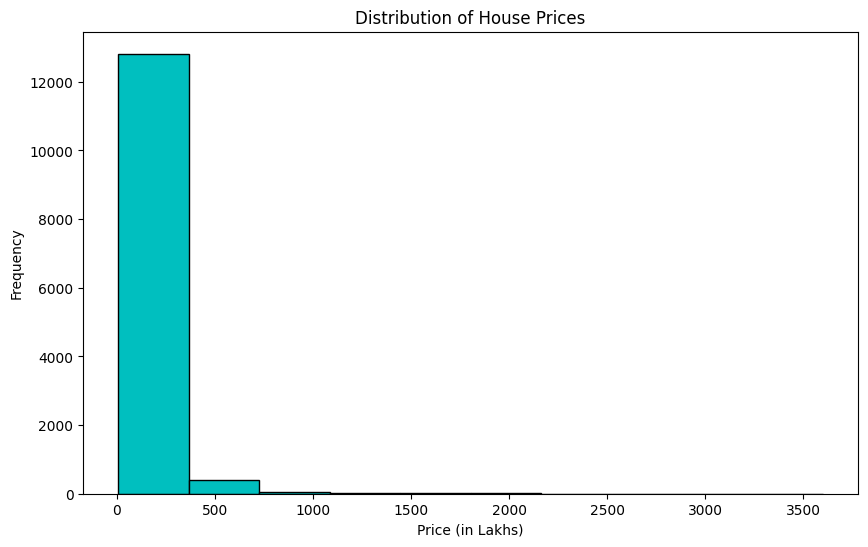

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'],color='c',edgecolor='k')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

In [50]:
df1=df.drop(['area_type','society','availability'],axis=1)
df1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [51]:
df1.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [52]:
df1['balcony']=df1['balcony'].fillna(df1['balcony'].mode()[0])
df1.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,0
price,0


In [53]:
df2=df1.dropna()
df2.isna().sum()

,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [54]:
df2.shape

(13246, 6)

In [55]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [56]:

df2['BHK']=df2['size'].apply(lambda x: int(x.split(" ")[0]))
df2

<ipython-input-56-1d70218372a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [57]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [58]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [59]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [60]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [61]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [62]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [63]:
td=df3['total_sqft'].value_counts()

In [64]:
len(df3.location.unique())

1304

In [65]:
df4=df3['location'].value_counts().sort_values(ascending=False)
df4

,count
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233
...,...
Rajarajesheari nagar,1
Millers Road,1
Pillahalli,1


In [66]:
len(df4[df4<=10])

1063

In [67]:
loc_lessthan_10=df4[df4<=10]
loc_lessthan_10

,count
location,
Dairy Circle,10
Kalkere,10
Dodsworth Layout,10
Naganathapura,10
Nagadevanahalli,10
...,...
Rajarajesheari nagar,1
Millers Road,1
Pillahalli,1


In [68]:
df3.location=df3.location.apply(lambda x: 'other' if x in loc_lessthan_10 else x)
len(df3.location.unique())

242

In [69]:
df3.tail()

,location,size,total_sqft,bath,balcony,price,BHK
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.0,5
13316,other,4 BHK,3600.0,5.0,2.0,400.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.0,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.0,4
13319,Doddathoguru,1 BHK,550.0,1.0,1.0,17.0,1


In [70]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [71]:
df5=df3[~(df3.total_sqft/df3.BHK<300)]
df5.shape

(12502, 8)

In [72]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape


(10244, 8)

In [73]:
df7=df6.drop(['size','price_per_sqft'],axis=1)
df7

,location,total_sqft,bath,balcony,price,BHK
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3
...,...,...,...,...,...,...
10239,other,1353.0,2.0,2.0,110.00,2
10240,other,812.0,1.0,0.0,26.00,1
10241,other,1440.0,2.0,2.0,63.93,3
10242,other,1075.0,2.0,2.0,48.00,2


In [74]:
df8=pd.get_dummies(df7.location)
df8

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10240,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10241,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10242,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [75]:
df9=pd.concat([df7,df8],axis=1)
df9

,location,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,other,1353.0,2.0,2.0,110.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10240,other,812.0,1.0,0.0,26.00,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10241,other,1440.0,2.0,2.0,63.93,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10242,other,1075.0,2.0,2.0,48.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [76]:
dfn=df9.drop(['location'],axis=1)
dfn

,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,3.0,44.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,40.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,83.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,40.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,65.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1353.0,2.0,2.0,110.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10240,812.0,1.0,0.0,26.00,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10241,1440.0,2.0,2.0,63.93,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10242,1075.0,2.0,2.0,48.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [77]:
x=dfn.drop(['price'],axis=1)
x

,total_sqft,bath,balcony,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1353.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10240,812.0,1.0,0.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10241,1440.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10242,1075.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [78]:
y=dfn.price
y

,price
0,44.00
1,40.00
2,83.00
3,40.00
4,65.00
...,...
10239,110.00
10240,26.00
10241,63.93
10242,48.00


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [80]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)  #how good the model is

0.8274775443422104

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={'fit_intercept':[True,False],'copy_X':[True,False],'n_jobs':[-1,1]}
gv=GridSearchCV(model,parameter,cv=10,scoring='r2')
gv.fit(x_train,y_train)
print(gv.best_params_)


In [ ]:
model1=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-1)
model1.fit(x_train,y_train)
model1.score(x_test,y_test)
y_pred=model1.predict(x_test)

In [ ]:
dfi=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
dfi

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score,root_mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print("Mean squared error is ",mse,'\n','Mean absolute error is',mae,'\n','Mean absolute percentage error is',mape,'\n','R2 Score is',r2,'\n','Root mean squared error',rmse)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices (in Lakhs)')
plt.ylabel('Predicted Prices (in Lakhs)')
plt.show()
